In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('mtbs_fod_pts_20170501.csv')

In [3]:
df1.groupby( [ "STATE","FIRE_YEAR"] )["FIRE_ID"].count()

STATE      FIRE_YEAR
Alabama    1985.0        4
           1987.0        3
           1993.0        2
           1994.0        3
           1995.0        2
           1996.0       10
           1998.0        2
           1999.0        4
           2000.0        7
           2001.0        2
           2002.0        3
           2004.0        6
           2005.0       48
           2006.0       32
           2007.0        8
           2008.0        9
           2009.0        3
           2010.0       24
           2011.0       10
           2012.0        1
           2013.0       26
           2014.0       52
           2015.0       50
Alaska     1984.0       15
           1985.0       21
           1986.0       33
           1987.0       11
           1988.0       18
           1989.0        4
           1990.0       43
                        ..
Wisconsin  2015.0        2
Wyoming    1985.0        5
           1986.0        1
           1987.0        1
           1988.0       20
       

In [4]:
x = df1.groupby('STATE')
cal = x.get_group('California')
y = cal.groupby('Fire_Type')
year_data = pd.concat([y.get_group('WF'), y.get_group('WFU')])

In [5]:
plot_data = year_data.groupby('FIRE_YEAR')["FIRE_ID"].count()
plot_data = plot_data.reset_index()
plot_data

,FIRE_YEAR,FIRE_ID
0,1984.0,38
1,1985.0,57
2,1986.0,26
3,1987.0,84
4,1988.0,52
5,1989.0,32
6,1990.0,34
7,1991.0,8
8,1992.0,35
9,1993.0,37


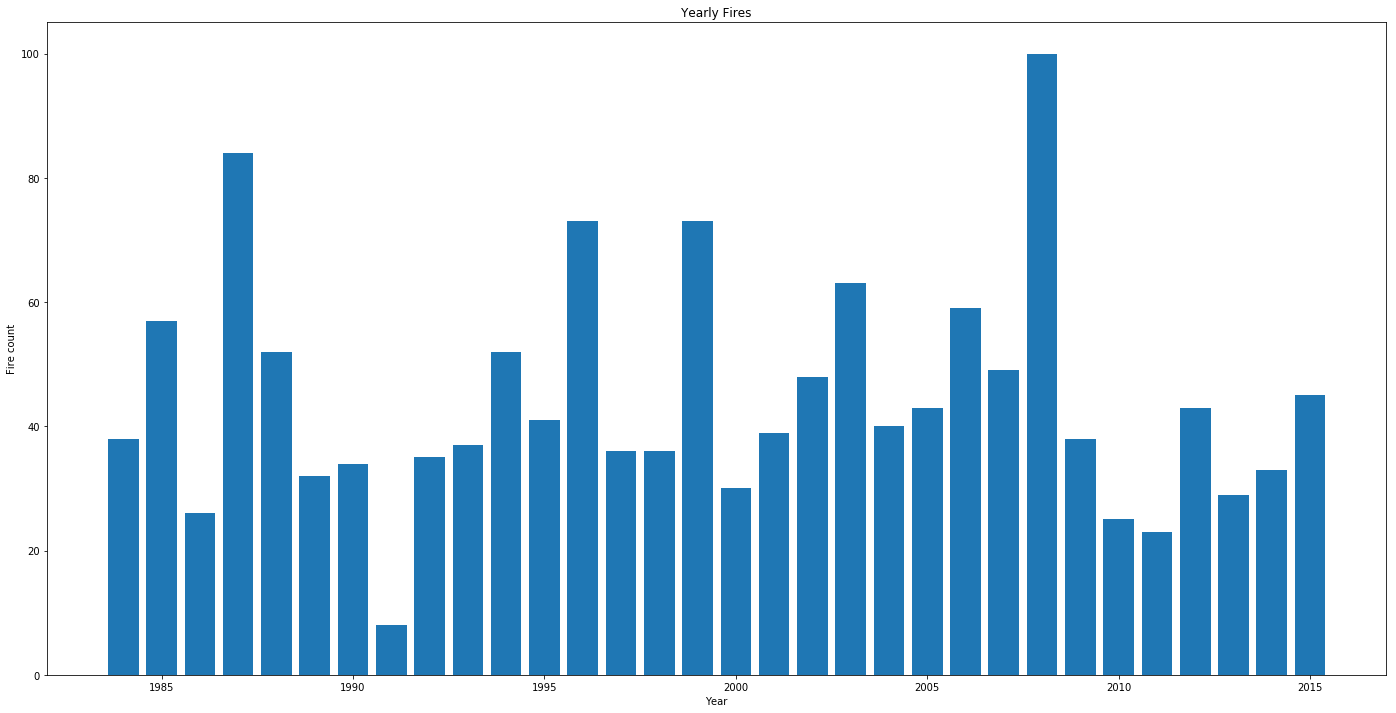

In [6]:
plt.figure(figsize=(24,12))
plt.bar(plot_data.FIRE_YEAR,plot_data.FIRE_ID)

plt.xlabel('Year')
plt.ylabel('Fire count')

plt.title('Yearly Fires')

plt.show()

In [7]:
year_data.groupby( ["FIRE_YEAR","FIRE_MON"] )["FIRE_ID"].count()

FIRE_YEAR  FIRE_MON
1984.0     3.0          1
           4.0          1
           5.0         12
           6.0          5
           7.0          6
           8.0          8
           9.0          2
           10.0         3
1985.0     5.0          4
           6.0         11
           7.0         25
           8.0          6
           9.0          3
           10.0         8
1986.0     4.0          1
           5.0          4
           6.0          2
           7.0          9
           8.0          3
           9.0          3
           10.0         1
           11.0         3
1987.0     4.0          1
           5.0          7
           6.0          7
           7.0          4
           8.0         50
           9.0         10
           10.0         4
           11.0         1
                       ..
2011.0     7.0          4
           8.0          5
           9.0          9
           10.0         1
2012.0     5.0          2
           6.0          5
           7.0    

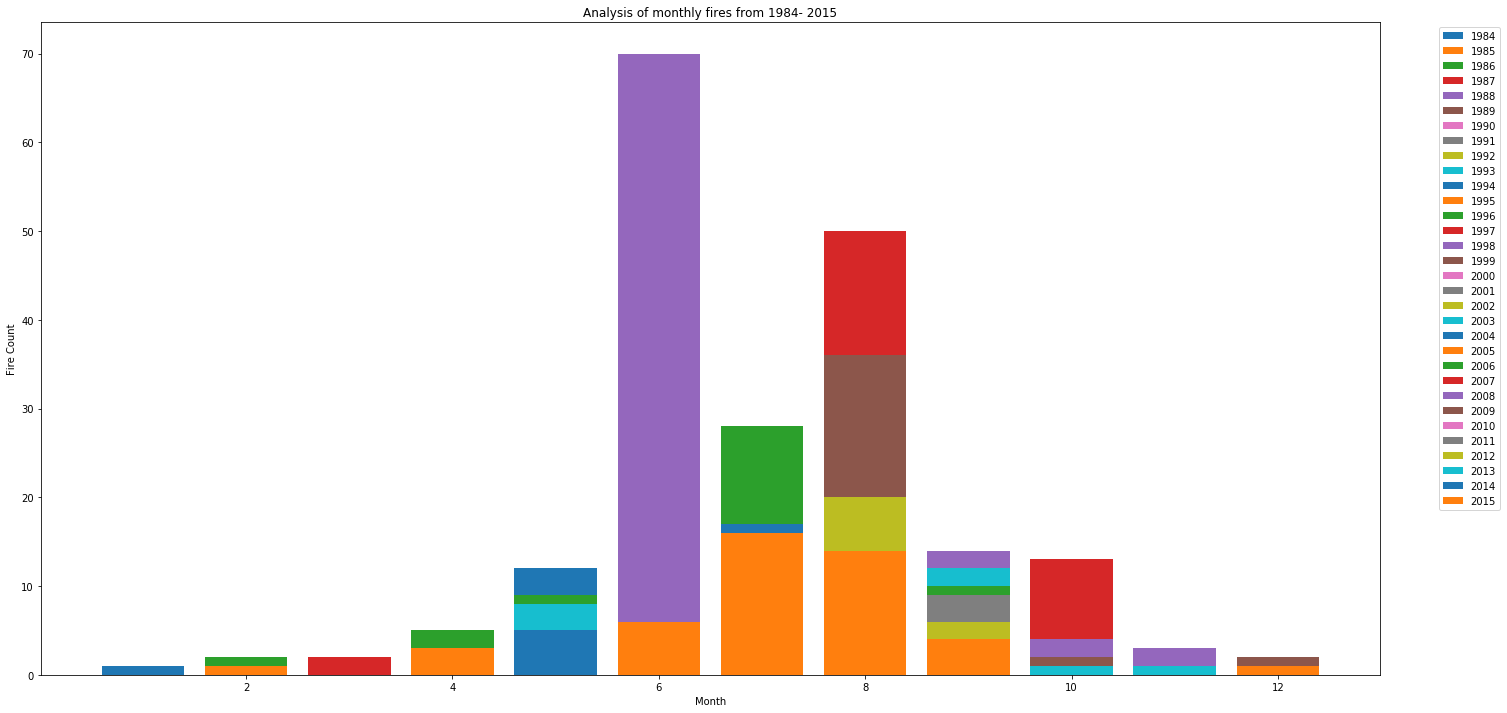

In [8]:
plt.figure(figsize=(24,12))
for i in range(1984,2016):
    s = year_data.groupby('FIRE_YEAR').get_group(i).groupby('FIRE_MON')["FIRE_ID"].count()
    s = s.reset_index()
    plt.bar(s.FIRE_MON,s.FIRE_ID, label=i)

#s = year_data.groupby('FIRE_YEAR').get_group(2014).groupby('FIRE_MON')["FIRE_ID"].count()
#s = s.reset_index()
#plt.bar(s.FIRE_MON,s.FIRE_ID, label="Example 2")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('Month')
plt.ylabel('Fire Count')

plt.title('Analysis of monthly fires from 1984- 2015')

plt.show()